# Read Image

In [3]:
%%capture
import matplotlib.pyplot as plt
import numpy as np
import os

import pywt
import pywt.data
from pywt._doc_utils import wavedec2_keys, draw_2d_wp_basis

from sklearn.metrics import mean_squared_error
from math import sqrt

In [4]:
def show_image_greyscale(image_matrix):
    """
    show_image_greyscale
    shows image in greyscale

    Input: matrix of image pixels
    Output: shows image
    """
    plt.imshow(image_matrix, cmap='gray', vmin=0, vmax=1)
    plt.axis('off')
    plt.margins(x=0)
    plt.show()

def read_pgm(im):
    """
    read_pgm reads pgm file and return the matrix store image data
    input: pgm file
    output: image matrix
    """
    with open(im, 'rb') as f:
        metadata = f.readline().decode("utf-8").rstrip('\n').split(" ")
        if len(metadata) == 1: # Read for more metadata in other line
            # Format
            format = metadata[0]
            
            # Check comment
            next_line = f.readline().decode("utf-8").rstrip('\n')
            while next_line.startswith('#'):
                next_line = f.readline().decode("utf-8").rstrip('\n')
            
            # Check Dimension
            shape = next_line.split(" ")
            num_rows = int(shape[1])
            num_columns = int(shape[0])

            # Get maximum grey level specify in the image
            max_grey_level = int(f.readline().decode("utf-8").rstrip('\n'))
        else: 
            format, num_columns, num_rows, max_grey_level = metadata[0], int(metadata[1]), int(metadata[2]), int(metadata[3])
        
        # Read pixel data
        pixel_data = f.read()
        if format == 'P2':
            # Decode byte to string to get the raster
            decoded_string = pixel_data.decode("utf-8")
            pgm_info = [int(data.strip("\n")) for data in decoded_string.split(" ") if data.strip("\n")]

            # Convert the list to a NumPy array and reshape
            pic = np.array(pgm_info, dtype=int).reshape(num_rows, num_columns) 
        
        elif format == 'P5':
            # Convert binary data to ASCII
            pixels = [byte for byte in pixel_data]
            pic = np.array(pixels, dtype=int).reshape(num_rows, num_columns)
        
        else:
            raise("Unknown format")

    # Normalize to the range [0, 1]
    normalized_image = pic / max_grey_level

    return normalized_image 

## Original Image

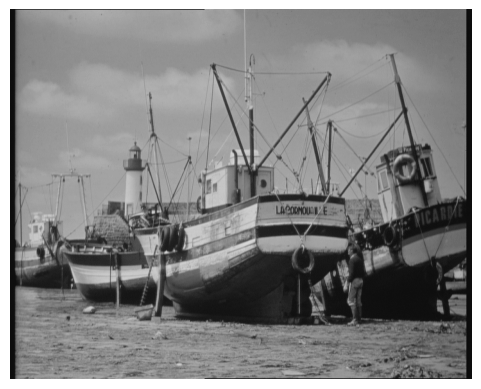

In [38]:
file = './Dataset/boats.pgm'
original_im = read_pgm(file)

show_image_greyscale(original_im)

## Noisy Image

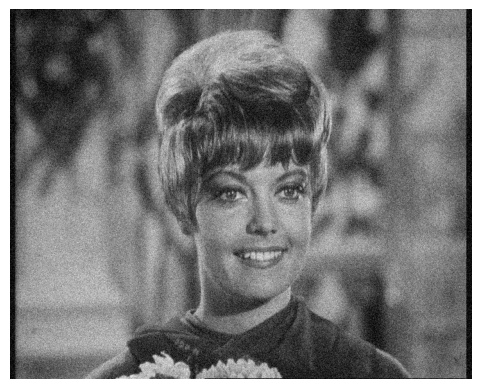

In [53]:
file = './Noisy/noisy_1/zelda2.pgm'
im1 = read_pgm(file)

show_image_greyscale(im1)

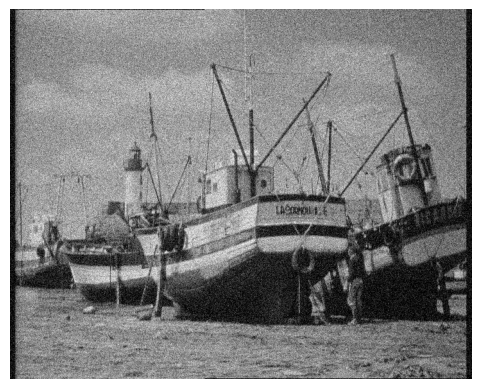

In [6]:
file = './Noisy/noisy_2/boats.pgm'
im2 = read_pgm(file)

show_image_greyscale(im2)

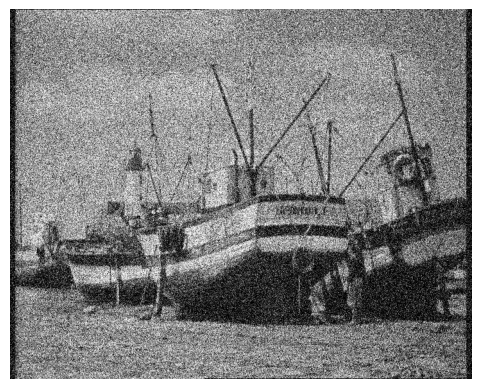

In [7]:
file = './Noisy/noisy_3/boats.pgm'
im3 = read_pgm(file)

show_image_greyscale(im3)

## Develop denoise algorithm

## Denoise Image using library

In [9]:
import matplotlib.pyplot as plt

from skimage.restoration import denoise_wavelet, estimate_sigma
from skimage import data, img_as_float
from skimage.util import random_noise
from skimage.metrics import peak_signal_noise_ratio

### Mean filter

### Median filter

### BayesShrink - Wavelet Denoising using function call

In [17]:
im_bayes_1 = denoise_wavelet(
    im1,
    method='BayesShrink',
    mode='soft',
    rescale_sigma=True,
)
im_bayes_2 = denoise_wavelet(
    im2,
    method='BayesShrink',
    mode='soft',
    rescale_sigma=True,
)
im_bayes_3 = denoise_wavelet(
    im3,
    method='BayesShrink',
    mode='soft',
    rescale_sigma=True,
)

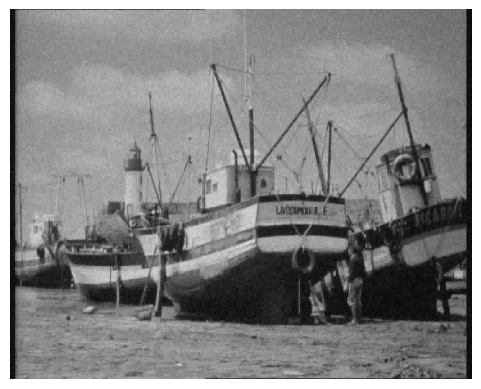

In [18]:
show_image_greyscale(im_bayes_1)

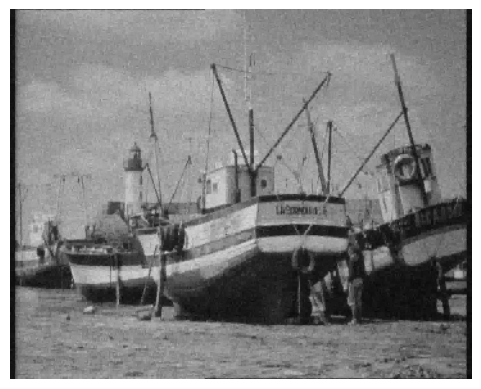

In [19]:
show_image_greyscale(im_bayes_2)

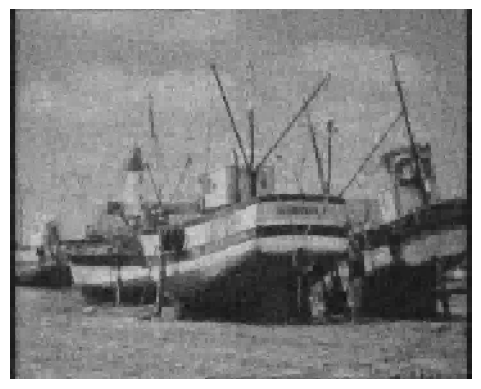

In [20]:
show_image_greyscale(im_bayes_3)

### VisuShrink - Wavelet Denoising using function call

Estimated Gaussian noise standard deviation = 0.07188690519080122
Estimated Gaussian noise standard deviation = 0.09943036497645408
Estimated Gaussian noise standard deviation = 0.20949478966259258


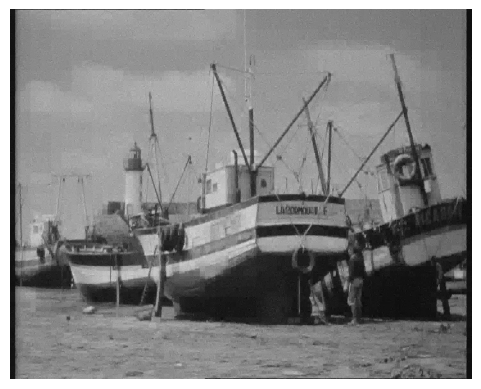

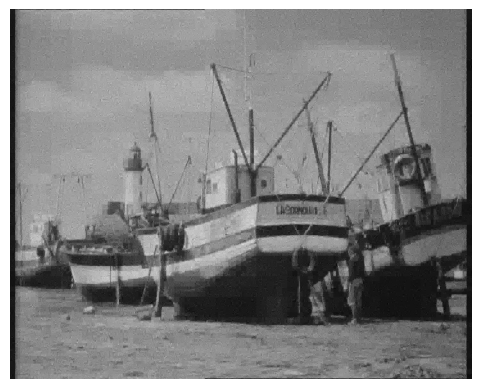

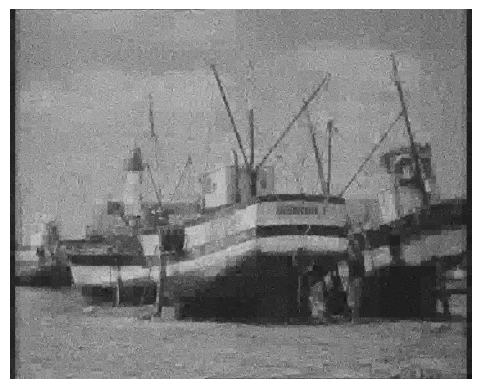

In [37]:
# Estimate the average noise standard deviation across color channels.
sigma_est_1 = estimate_sigma(im1, channel_axis=-1, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f'Estimated Gaussian noise standard deviation = {sigma_est_1}')

# Estimate the average noise standard deviation across color channels.
sigma_est_2 = estimate_sigma(im2, channel_axis=-1, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f'Estimated Gaussian noise standard deviation = {sigma_est_2}')

# Estimate the average noise standard deviation across color channels.
sigma_est_3 = estimate_sigma(im3, channel_axis=-1, average_sigmas=True)
# Due to clipping in random_noise, the estimate will be a bit smaller than the
# specified sigma.
print(f'Estimated Gaussian noise standard deviation = {sigma_est_3}')

im_visushrink_1 = denoise_wavelet(
    im1,
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est_1/4,
    rescale_sigma=True,
)

im_visushrink_2 = denoise_wavelet(
    im2,
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est_2/4,
    rescale_sigma=True,
)

im_visushrink_3 = denoise_wavelet(
    im3,
    method='VisuShrink',
    mode='soft',
    sigma=sigma_est_3/4,
    rescale_sigma=True,
)



show_image_greyscale(im_visushrink_1)
show_image_greyscale(im_visushrink_2)
show_image_greyscale(im_visushrink_3)

## Compare the result

### PSNR

Compare the result using PSNR (Peak Signal to Noise Ratio)
- The higher the value is the better the image

In [35]:
print("==== PSNR - Original ====")
psnr_noisy_1 = peak_signal_noise_ratio(original_im, im1)
print(f"im1 = {psnr_noisy_1}")

psnr_noisy_2 = peak_signal_noise_ratio(original_im, im2)
print(f"im2 = {psnr_noisy_2}")

psnr_noisy_3 = peak_signal_noise_ratio(original_im, im3)
print(f"im3 = {psnr_noisy_3}")

print("==== PSNR - Reduce noise by BayesShrink ====")
psnr_noisy_1_bayes = peak_signal_noise_ratio(original_im, im_bayes_1)
print(f"im1 = {psnr_noisy_1_bayes}")

psnr_noisy_2_bayes = peak_signal_noise_ratio(original_im, im_bayes_2)
print(f"im2 = {psnr_noisy_2_bayes}")

psnr_noisy_3_bayes = peak_signal_noise_ratio(original_im, im_bayes_3)
print(f"im3 = {psnr_noisy_3_bayes}")

print("==== PSNR - Reduce noise by VisuShrink/4 ====")
psnr_noisy_1_visu = peak_signal_noise_ratio(original_im, im_visushrink_1)
print(f"im1 = {psnr_noisy_1_visu}")

psnr_noisy_2_visu = peak_signal_noise_ratio(original_im, im_visushrink_2)
print(f"im2 = {psnr_noisy_2_visu}")

psnr_noisy_3_visu = peak_signal_noise_ratio(original_im, im_visushrink_3)
print(f"im3 = {psnr_noisy_3_visu}")

==== PSNR - Original ====
im1 = 23.129958591252887
im2 = 20.20032212360011
im3 = 13.64196475997476
==== PSNR - Reduce noise by BayesShrink ====
im1 = 29.152835211391285
im2 = 27.43700037998863
im3 = 23.81085024064083
==== PSNR - Reduce noise by VisuShrink/4 ====
im1 = 28.5396116751551
im2 = 26.543289284412705
im3 = 21.569186799062713


### MSE

## Finding the threshold

### Step 1: Doing the wavelet decomposition

### Step 2: Calculate the noise variance from HH subband

In [51]:
est_noise_variance = (np.median(np.abs(im1))/ 0.06745) ** 2
est_noise_variance

np.float64(60.69673468133016)

### Step 3: Calculate the threshold TNew at each high subband, and apply soft-threshold to the wavelet coefficients.